**Esempio di calcolo degli indici di Jaccard e Dice**

Importiamo le librerie necessarie

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import dice

Creiamo due maschere parzialmente sovrapposte

In [4]:
dim=256  # image dimension

# create masks
A = np.zeros([dim,dim])  # background images
B = np.zeros([dim,dim])
center_mask_A = [int(dim/2),int(dim/2)] # center of A mask
dim_mask_A = [int(dim/4),int(dim/4)]            # dimension of A mask
A[center_mask_A[0]-dim_mask_A[0]:center_mask_A[0]+dim_mask_A[0],center_mask_A[1]-dim_mask_A[1]:center_mask_A[1]+dim_mask_A[1]]=1

shift_mask=20  # shift between masks
center_mask_B = [int(dim/2)+shift_mask,int(dim/2)+shift_mask] # center of B mask
dim_mask_B=dim_mask_A # dimension of B mask
B[center_mask_B[0]-dim_mask_B[0]:center_mask_B[0]+dim_mask_B[0],center_mask_B[1]-dim_mask_B[1]:center_mask_B[1]+dim_mask_B[1]]=1

Visualizziamo le maschere risultanti, l'overlapping area dovrebbe apparire in bianco (tutti i canali uguali)

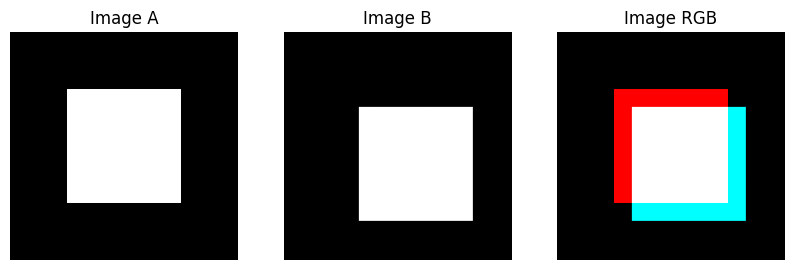

In [5]:
fig = plt.figure(figsize=(10,4)) 
axs0 = fig.add_subplot(1, 3, 1)
axs1 = fig.add_subplot(1, 3, 2)
axs2 = fig.add_subplot(1, 3, 3)
imgplot = axs0.imshow(A,cmap='gray')
axs0.set_title("Image A",fontsize=12)
axs0.set_axis_off()
imgplot = axs1.imshow(B,cmap='gray')
axs1.set_title("Image B",fontsize=12)
axs1.set_axis_off()
RGB_image=np.zeros([dim,dim,3])  # create RGB image
RGB_image[:,:,0]=A
RGB_image[:,:,1]=B
RGB_image[:,:,2]=B
imgplot = axs2.imshow(RGB_image,cmap='viridis')
axs2.set_title("Image RGB",fontsize=12)
axs2.set_axis_off()

Calcoliamo la sovrapposizione tra le maschere (overlapping area)

In [6]:
overlap_id = np.array(np.where((A ==1)&(B==1)))
overlap=len(overlap_id[0])
print('Overlap area = ',overlap,' (number of pixels)')

Overlap area =  11664  (number of pixels)


Calcoliamo l'indice di Jaccard

In [7]:
AB_mask_id = np.array(np.where((A ==1) | (B==1)))
AB_mask_size=len(AB_mask_id[0])
Jaccard_index = overlap/AB_mask_size
print('Jaccard index = ',Jaccard_index,' (number of pixels)')

Jaccard index =  0.5526914329037149  (number of pixels)


Calcoliamo l'indice di Jaccard attraverso la libreria sklearn

In [8]:
Jaccard_lib=jaccard_score(A,B,average="micro")
print('Jaccard index (library) = ',Jaccard_lib,' (number of pixels)')

Jaccard index (library) =  0.5526914329037149  (number of pixels)


Calcoliamo l'indice di Dice

In [11]:
A_mask_id = np.array(np.where(A ==1))
A_mask_size=len(A_mask_id[0])
B_mask_id = np.array(np.where(B ==1))
B_mask_size=len(B_mask_id[0])
Dice_index=2*overlap/(A_mask_size+B_mask_size)
print('Dice index = ',Dice_index,' (number of pixels)')
Dice_lib1 = 2*Jaccard_lib / (1 + Jaccard_lib)
Dice_lib2 = 1-dice(A.flatten(),B.flatten())
print('Dice index (library) = ',Dice_lib1,Dice_lib2,' (number of pixels)')


Dice index =  0.7119140625  (number of pixels)
Dice index (library) =  0.7119140625 0.7119140625  (number of pixels)
